DATA PROCESSING
- Normalisasi data numerical
- pemberian index pada data categorical

Customer Segmentation K-PROTOTYPES: 
1. Penentuan Nilai k (jumlah kelas)
-> menggunakan Elbow Plot
2. Pemilihan Centroid (pusat kluster)
3. Perhitungan dissimilarity measures untuk fitur categorical
4. Perhitungan dissimiliarity measures untuk fitur numerik
5. Perhitungan fungsi biaya (cost) untuk tiap data dari setiap cluster


In [ ]:
pip install kmodes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes   
from kmodes.kprototypes import KPrototypes 

import pickle  
from pathlib import Path

Import Data

In [ ]:
#Load the data
#import drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Customer Segmentation/Input/Test/CustSegmSTI_Aug18Jul21_Age.csv',sep=';')

In [ ]:
data.head()

,No_cust,Name,Age,Job,Amount,Dept_code
0,100002,"ACIAK, UD.",46,Others,18668637,PDG
1,100004,AFEN,71,Tukang/ Workshop Furniture,65736728,PDG
2,100008,ALAM INDAH GRANIT,46,Others,2296001,PDG
3,100011,ALFI TABING,43,Kontraktor,10147272,PDG
4,100012,ALFI PERABOT (AJO),45,Tukang/ Workshop Furniture,12201820,PDG


In [ ]:
#menampilkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No_cust    1147 non-null   int64 
 1   Name       1147 non-null   object
 2   Age        1147 non-null   int64 
 3   Job        1147 non-null   object
 4   Amount     1147 non-null   int64 
 5   Dept_code  1147 non-null   object
dtypes: int64(3), object(3)
memory usage: 53.9+ KB


In [ ]:
data

,No_cust,Name,Age,Job,Amount,Dept_code
0,100002,"ACIAK, UD.",46,Others,18668637,PDG
1,100004,AFEN,71,Tukang/ Workshop Furniture,65736728,PDG
2,100008,ALAM INDAH GRANIT,46,Others,2296001,PDG
3,100011,ALFI TABING,43,Kontraktor,10147272,PDG
4,100012,ALFI PERABOT (AJO),45,Tukang/ Workshop Furniture,12201820,PDG
...,...,...,...,...,...,...
1142,103838,RIZKY RAMADHAN,43,Kontraktor,5434546,PDG
1143,103839,"INDOMATIC MANDIRI SENTOSA, PT.",46,Others,11181817,PDG
1144,103840,ZAINUDDIN,45,Tukang/ Workshop Furniture,2950454,PDG
1145,103841,TANJUNG PURA MOTOR,46,Others,878182,PDG


In [ ]:
#Jika ada data yg null, gunakan replace
#data['Age'] = data['Age'].replace(np.nan, 38)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

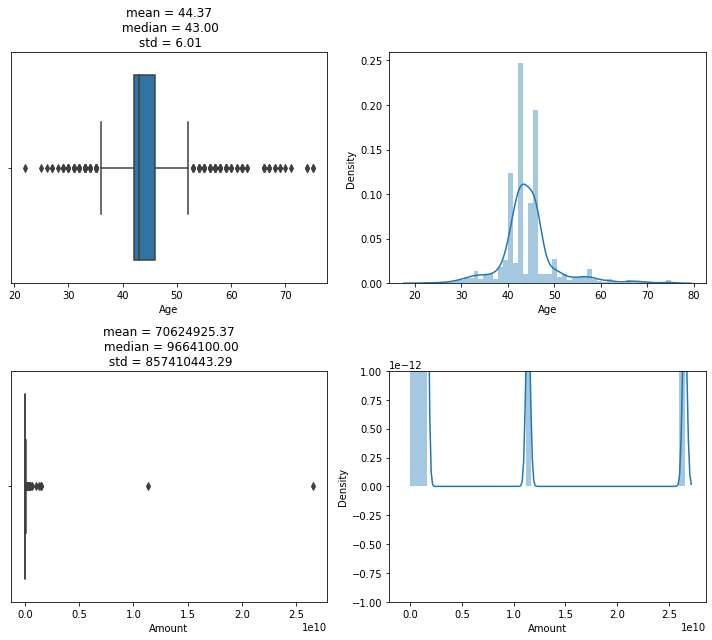

In [ ]:
#Eksplorasi Data Numerik
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(data[kol], ax = axs[i][0])
      #Distplot: menampilkan visualisasi distribusi dari data numerik di seaborn
	    sns.distplot(data[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(data[kol].mean(), data[kol].median(), data[kol].std()))
      #Std(standard deviasi): measured as the spread of data distribution in the given data set
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Age','Amount'] 
#kolom_numerik = ['Amount'] 
observasi_num(kolom_numerik) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

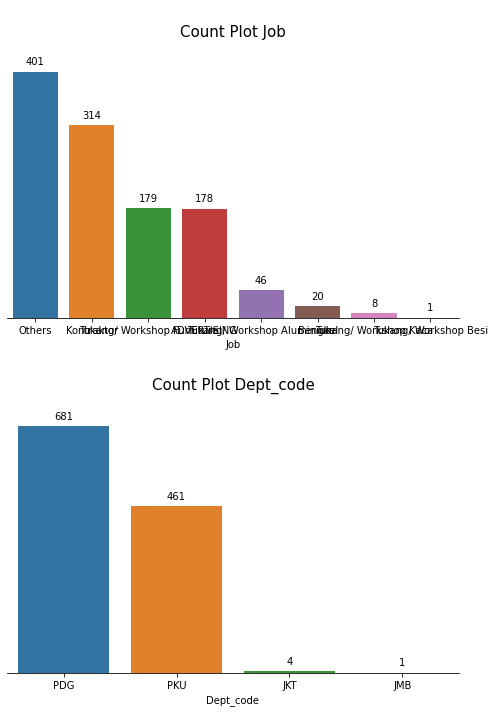

In [ ]:
#Eksplorasi Data Kategorikal
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Job','Dept_code']  

# Membuat canvas
fig, axs = plt.subplots(2,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(data[kol], order = data[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

Standarisasi Kolom Numerik

In [ ]:
from sklearn.preprocessing import StandardScaler  
kolom_numerik = ['Age','Amount']  
#kolom_numerik = ['Amount']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(data[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(data[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=data.index, columns=data[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

          Age        Amount
count  1147.0  1.147000e+03
mean     44.4  7.062493e+07
std       6.0  8.574104e+08
min      22.0  1.727300e+04
25%      42.0  2.362773e+06
50%      43.0  9.664100e+06
75%      46.0  3.079168e+07
max      75.0  2.652675e+10
Contoh hasil standardisasi

        Age    Amount
0  0.272127 -0.060623
1  4.433861 -0.005704
2  0.272127 -0.079727
3 -0.227281 -0.070566
4  0.105658 -0.068169
Statistik hasil standardisasi

          Age  Amount
count  1147.0  1147.0
mean     -0.0    -0.0
std       1.0     1.0
min      -4.0    -0.0
25%      -0.0    -0.0
50%      -0.0    -0.0
75%       0.0    -0.0
max       5.0    31.0


In [ ]:
#Mengubah tipe data
data['Job'] = data['Job'].apply(lambda x:str(x))
data['Dept_code'] = data['Dept_code'].apply(lambda x:str(x))

In [ ]:
data.dtypes

No_cust       int64
Name         object
Age           int64
Job          object
Amount        int64
Dept_code    object
dtype: object

In [ ]:
#Konversi Kategorikal Data dgn Label Encoder

from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Job','Dept_code']  
  
# Membuat salinan data frame  
df_encode = data[kolom_kategorikal].copy()  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head(9))

   Job  Dept_code
0    3          2
1    6          2
2    3          2
3    2          2
4    6          2
5    3          2
6    2          2
7    3          2
8    3          2


In [ ]:
#Menggabungkan Data untuk Permodelan
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head(9))

   Job  Dept_code       Age    Amount
0    3          2  0.272127 -0.060623
1    6          2  4.433861 -0.005704
2    3          2  0.272127 -0.079727
3    2          2 -0.227281 -0.070566
4    6          2  0.105658 -0.068169
5    3          2  3.934453 -0.081986
6    2          2 -0.227281 -0.081715
7    3          2  0.272127 -0.078644
8    3          2  0.272127 -0.081869


Permodelan K-Prototypes

In [ ]:
df_model.head()

,Job,Dept_code,Age,Amount
0,3,2,0.272127,-0.060623
1,6,2,4.433861,-0.005704
2,3,2,0.272127,-0.079727
3,2,2,-0.227281,-0.070566
4,6,2,0.105658,-0.068169


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Job        1147 non-null   int64  
 1   Dept_code  1147 non-null   int64  
 2   Age        1147 non-null   float64
 3   Amount     1147 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 36.0 KB


In [ ]:
df_model.dtypes

Job            int64
Dept_code      int64
Age          float64
Amount       float64
dtype: object

In [ ]:
data['Age'] = data['Age'].apply(lambda x:str(x))
data['Amount'] = data['Amount'].apply(lambda x:str(x))

Mencari Jumlah Cluster yang Optimal

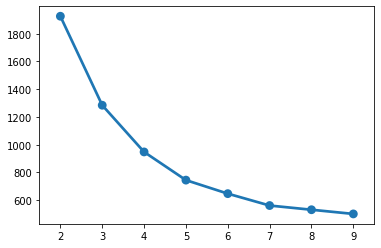

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1])
  cost[k]= kproto.cost_
                                
# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

In [ ]:
print(kproto.cluster_centroids_)

[[ 1.29518662 -0.06060727  3.          2.        ]
 [-0.10126189 -0.04275831  2.          3.        ]
 [-0.22728075  1.55333338  6.          2.        ]
 [ 3.18172228 -0.04049539  3.          2.        ]
 [-0.22728075 22.03436132  2.          2.        ]
 [-0.28581943 -0.03290231  2.          2.        ]
 [ 0.2315636  -0.05218254  3.          2.        ]
 [-1.73937746 -0.03428043  3.          2.        ]
 [-0.60274154 -0.03944358  0.          3.        ]]


In [ ]:
#Membuat Model
#Pickle adalah sebuah modul pada standard library python, untuk menyimpan dan membaca data ke dalam /dari sebuah file
#Pickle: save machine leaning model
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1])

#Save Model
#Dump: save into binary format
pickle.dump(kproto, open('cluster.pkl', 'wb'))

In [ ]:
#Menggunakan model

clusters = kproto.predict(df_model, categorical=[0,1])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = data.copy()
df_final['cluster'] = clusters
print(df_final.head())


segmen pelanggan: [2 0 2 ... 2 2 1]

   No_cust                Name Age  ...    Amount Dept_code cluster
0   100002          ACIAK, UD.  46  ...  18668637       PDG       2
1   100004                AFEN  71  ...  65736728       PDG       0
2   100008   ALAM INDAH GRANIT  46  ...   2296001       PDG       2
3   100011         ALFI TABING  43  ...  10147272       PDG       1
4   100012  ALFI PERABOT (AJO)  45  ...  12201820       PDG       2

[5 rows x 7 columns]


In [ ]:
#Menampilkan Cluster Tiap Pelanggan
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

     No_cust                    Name Age  ...     Amount Dept_code cluster
1     100004                    AFEN  71  ...   65736728       PDG       0
5     100015                   ANANG  68  ...     360045       PDG       0
10    100029  ASENG PERABOT P. KARAM  68  ...   95324997       PDG       0
12    100032             TIA PERABOT  58  ...    9264906       PDG       0
26    100065                     CIN  67  ...   10331524       PDG       0
..       ...                     ...  ..  ...        ...       ...     ...
855   102535                  NASRUL  54  ...     556364       PDG       0
860   102554                  DASRIL  60  ...     750000       PDG       0
861   102558         SIANTAR LISTRIK  58  ...  402349323       PDG       0
867   102647                  AKBARI  57  ...      54728       PDG       0
872   102956        BUNGA KARYA, CV.  59  ...  270343457       PDG       0

[79 rows x 7 columns]

Pelanggan cluster: 1

      No_cust                  

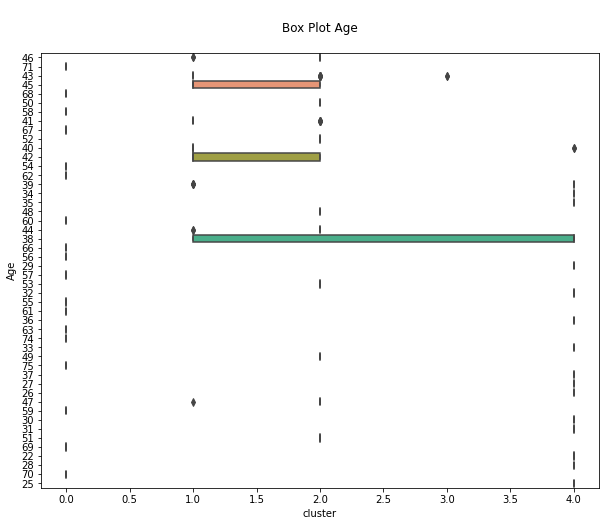

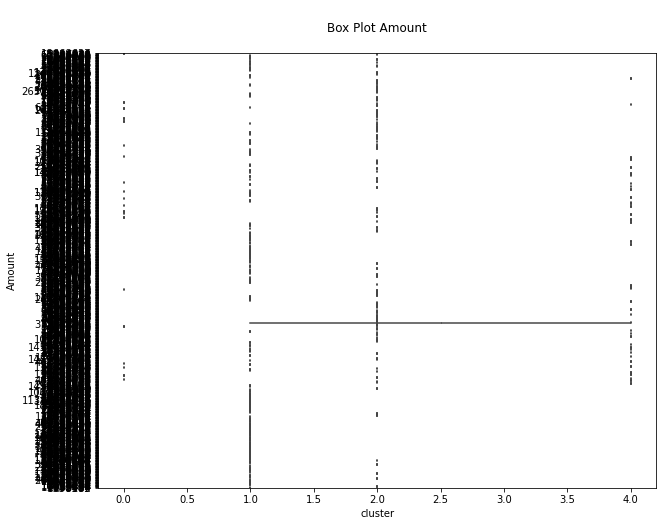

In [ ]:
#Visualisasi Hasil Clustering
import matplotlib.pyplot as plt
# Data Numerical
#kolom_numerik = ['Amount']
kolom_numerik = ['Age', 'Amount']
for i in kolom_numerik:
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

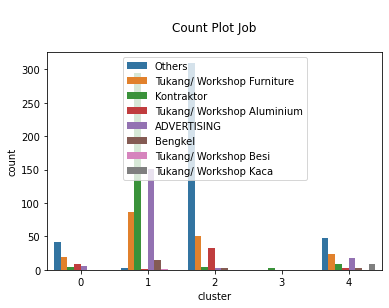

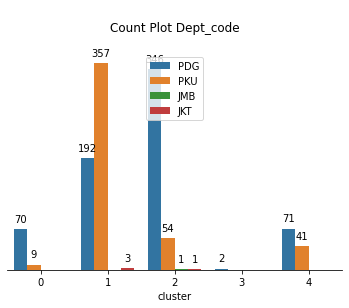

In [ ]:
#VISUALISASI CLUSTER KOLOM JOB DAN DEPT CODE

import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Job','Dept_code']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [ ]:
#Menamakan Cluster
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
0: 'Diamond Young Member',
1: 'Diamond Senior Member',
2: 'Silver Member',
3: 'Gold Young Member',
4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No_cust    1147 non-null   int64 
 1   Name       1147 non-null   object
 2   Age        1147 non-null   object
 3   Job        1147 non-null   object
 4   Amount     1147 non-null   object
 5   Dept_code  1147 non-null   object
 6   cluster    1147 non-null   uint16
 7   segmen     1147 non-null   object
dtypes: int64(1), object(6), uint16(1)
memory usage: 65.1+ KB
None
   No_cust                Name Age  ... Dept_code cluster                 segmen
0   100002          ACIAK, UD.  46  ...       PDG       2          Silver Member
1   100004                AFEN  71  ...       PDG       0   Diamond Young Member
2   100008   ALAM INDAH GRANIT  46  ...       PDG       2          Silver Member
3   100011         ALFI TABING  43  ...       PDG       1  Diamond Senior Member
4   100012  ALFI PERABOT (AJO)  

In [ ]:
#OUTPUT CSV
df_final.to_csv('output_custseg_sti.csv', index=False, sep=';')